## FINAL PROJECT - CLASSIFICATION PROBLEM

### Case of Study: Airline Passenger Satisfaction

This dataset contains an airline passenger satisfaction survey.

***FEATURES***:

- **Gender:** Gender of the passengers (Female, Male).
- **Customer Type:** The customer type (Loyal customer, disloyal customer).
- **Age:** The actual age of the passengers
- **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)
- **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- **Flight distance:** The flight distance of this journey
- **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient
- **Ease of Online booking:** Satisfaction level of online booking
- **Gate location:** Satisfaction level of Gate location
- **Food and drink:** Satisfaction level of Food and drink
- **Online boarding:** Satisfaction level of online boarding
- **Seat comfort:** Satisfaction level of Seat comfort
- **Inflight entertainment:** Satisfaction level of inflight entertainment
- **On-board service:** Satisfaction level of On-board service
- **Leg room service:** Satisfaction level of Leg room service
- **Baggage handling:** Satisfaction level of baggage handling
- **Check-in service:** Satisfaction level of Check-in service
- **Inflight service:** Satisfaction level of inflight service
- **Cleanliness:** Satisfaction level of Cleanliness
- **Departure Delay in Minutes:** Minutes delayed when departure
- **Arrival Delay in Minutes:** Minutes delayed when Arrival

- ***SATISFACTION:*** Airline satisfaction level(Satisfaction, neutral or dissatisfaction) 

#### 1. Load the dataset

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn

In [2]:
# load train and test set
dataset = pd.read_csv("dataset/train.csv", sep =",", low_memory = False)
dataset.add(pd.read_csv("dataset/test.csv", sep =",", low_memory = False))
dataset.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


#### 2. Analysis of the number and content of columns

In [3]:
# dimensions of dataset
print("#samples = ", dataset.shape[0])
print("#features = ", dataset.shape[1])

#samples =  103904
#features =  25


---
**Comment**: we can see that before any data manipulations there are 103 904 samples of data with 25 features.

---

In [4]:
# definition of preprocessor
from scripts import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 25 
 Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Numerical features: 
 ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

---
**Comment**: here we can see that all features were correctly defined as numerical and categorical, there are no features in categorical that should be numerical, so we don't need to alter anything. 

---

#### 3. Data Cleaning

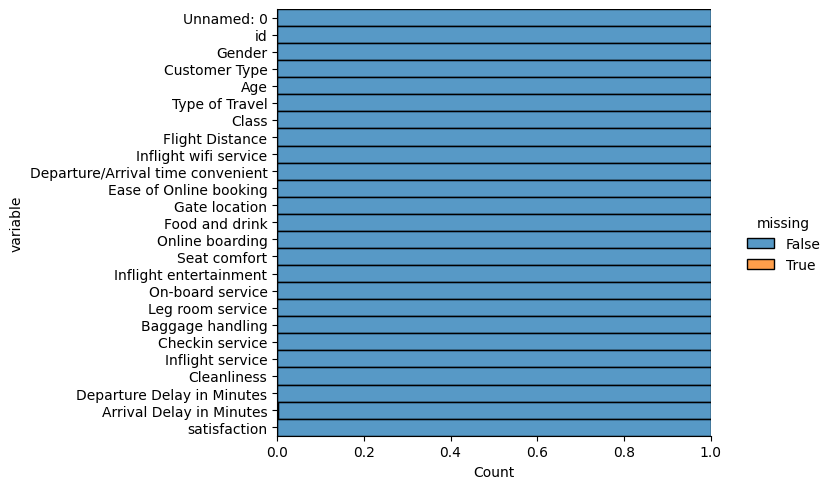

In [5]:
dp.filter_missing(dataset)

In [6]:
dataset = dataset.dropna()

---
**Comment:** here we astimated our dataset whether it has missing values for any feature. It seems that there are some values nan that we should delete. 

---

#### 4. Outlier Detection and Removal

In [7]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [8]:
# cycle to check the number of outliers in each numerical column
for col in num_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Unnamed: 0 ***
#samples outlier to distribution = 4714
%outliers = 4.55 %

*** Outliers detection in id ***
#samples outlier to distribution = 4714
%outliers = 4.55 %

*** Outliers detection in Age ***
#samples outlier to distribution = 3898
%outliers = 3.76 %

*** Outliers detection in Flight Distance ***
#samples outlier to distribution = 4656
%outliers = 4.49 %

*** Outliers detection in Inflight wifi service ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Departure/Arrival time convenient ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Ease of Online booking ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Gate location ***
#samples outlier to distribution = 1
%outliers = 0.0 %

*** Outliers detection in Food and drink ***
#samples outlier to distribution = 105
%outliers = 0.1 %

*** Outliers detection in Online boarding ***
#samples outlier to

---
**Comment:** 
- This function shows the percentages of outliers for numerical features. We should delete them.
- By removing extreme values, we ensured the model learns patterns that are representative of the general dataset rather than being skewed by anomalies.

---

Master function to clean data

In [9]:
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [10]:
num_cols

['Unnamed: 0',
 'id',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [11]:
# function to clean dataset
def clean_data(frame, is_test=False):
    # drop all duplicate values
    frame = frame.drop_duplicates()
    # deleting  unnecessary features
    frame = frame.drop(columns=["Unnamed: 0", "id"])
    
    return frame

---
**Comment:** 
- This function cleans our data dropping duplicates because they are not preferable and dropping Unnamed, ID columns because they do not has any valuable information for classification.
- In order for the model not to take into account features that do not make much sense for the desired classification during training, they need to be removed. In our dataset, this is the unnamed column and the passenger ID.

---

#### 5. Cleaned dataset

In [12]:
dataset = clean_data(dataset)
dataset.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


---
***Comments:*** 
- Here we can see our data after cleaning.

- Removing Duplicates:
Duplicate rows in the dataset were identified and removed to prevent bias and redundancy during training. This ensures the model learns meaningful patterns rather than repeated instances.
- Filtering Missing Values:
Missing data will be imputed or removed to ensure model reliability.
- In order for the model not to take into account features that do not make much sense for the desired classification during training, they need to be removed. In our dataset, this is the unnamed column and the passenger ID.

---

Redefine metadata

In [13]:
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 23 
 Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Numerical features: 
 ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Categorical features: 
 ['Gender', 'Cus

---
**Comment:** These are correctly defined numerical and categorical features of our dataset.

---

#### 6. Exploration of numerical features

Histograms of numerical features were plotted to understand their distribution and identify potential anomalies or patterns

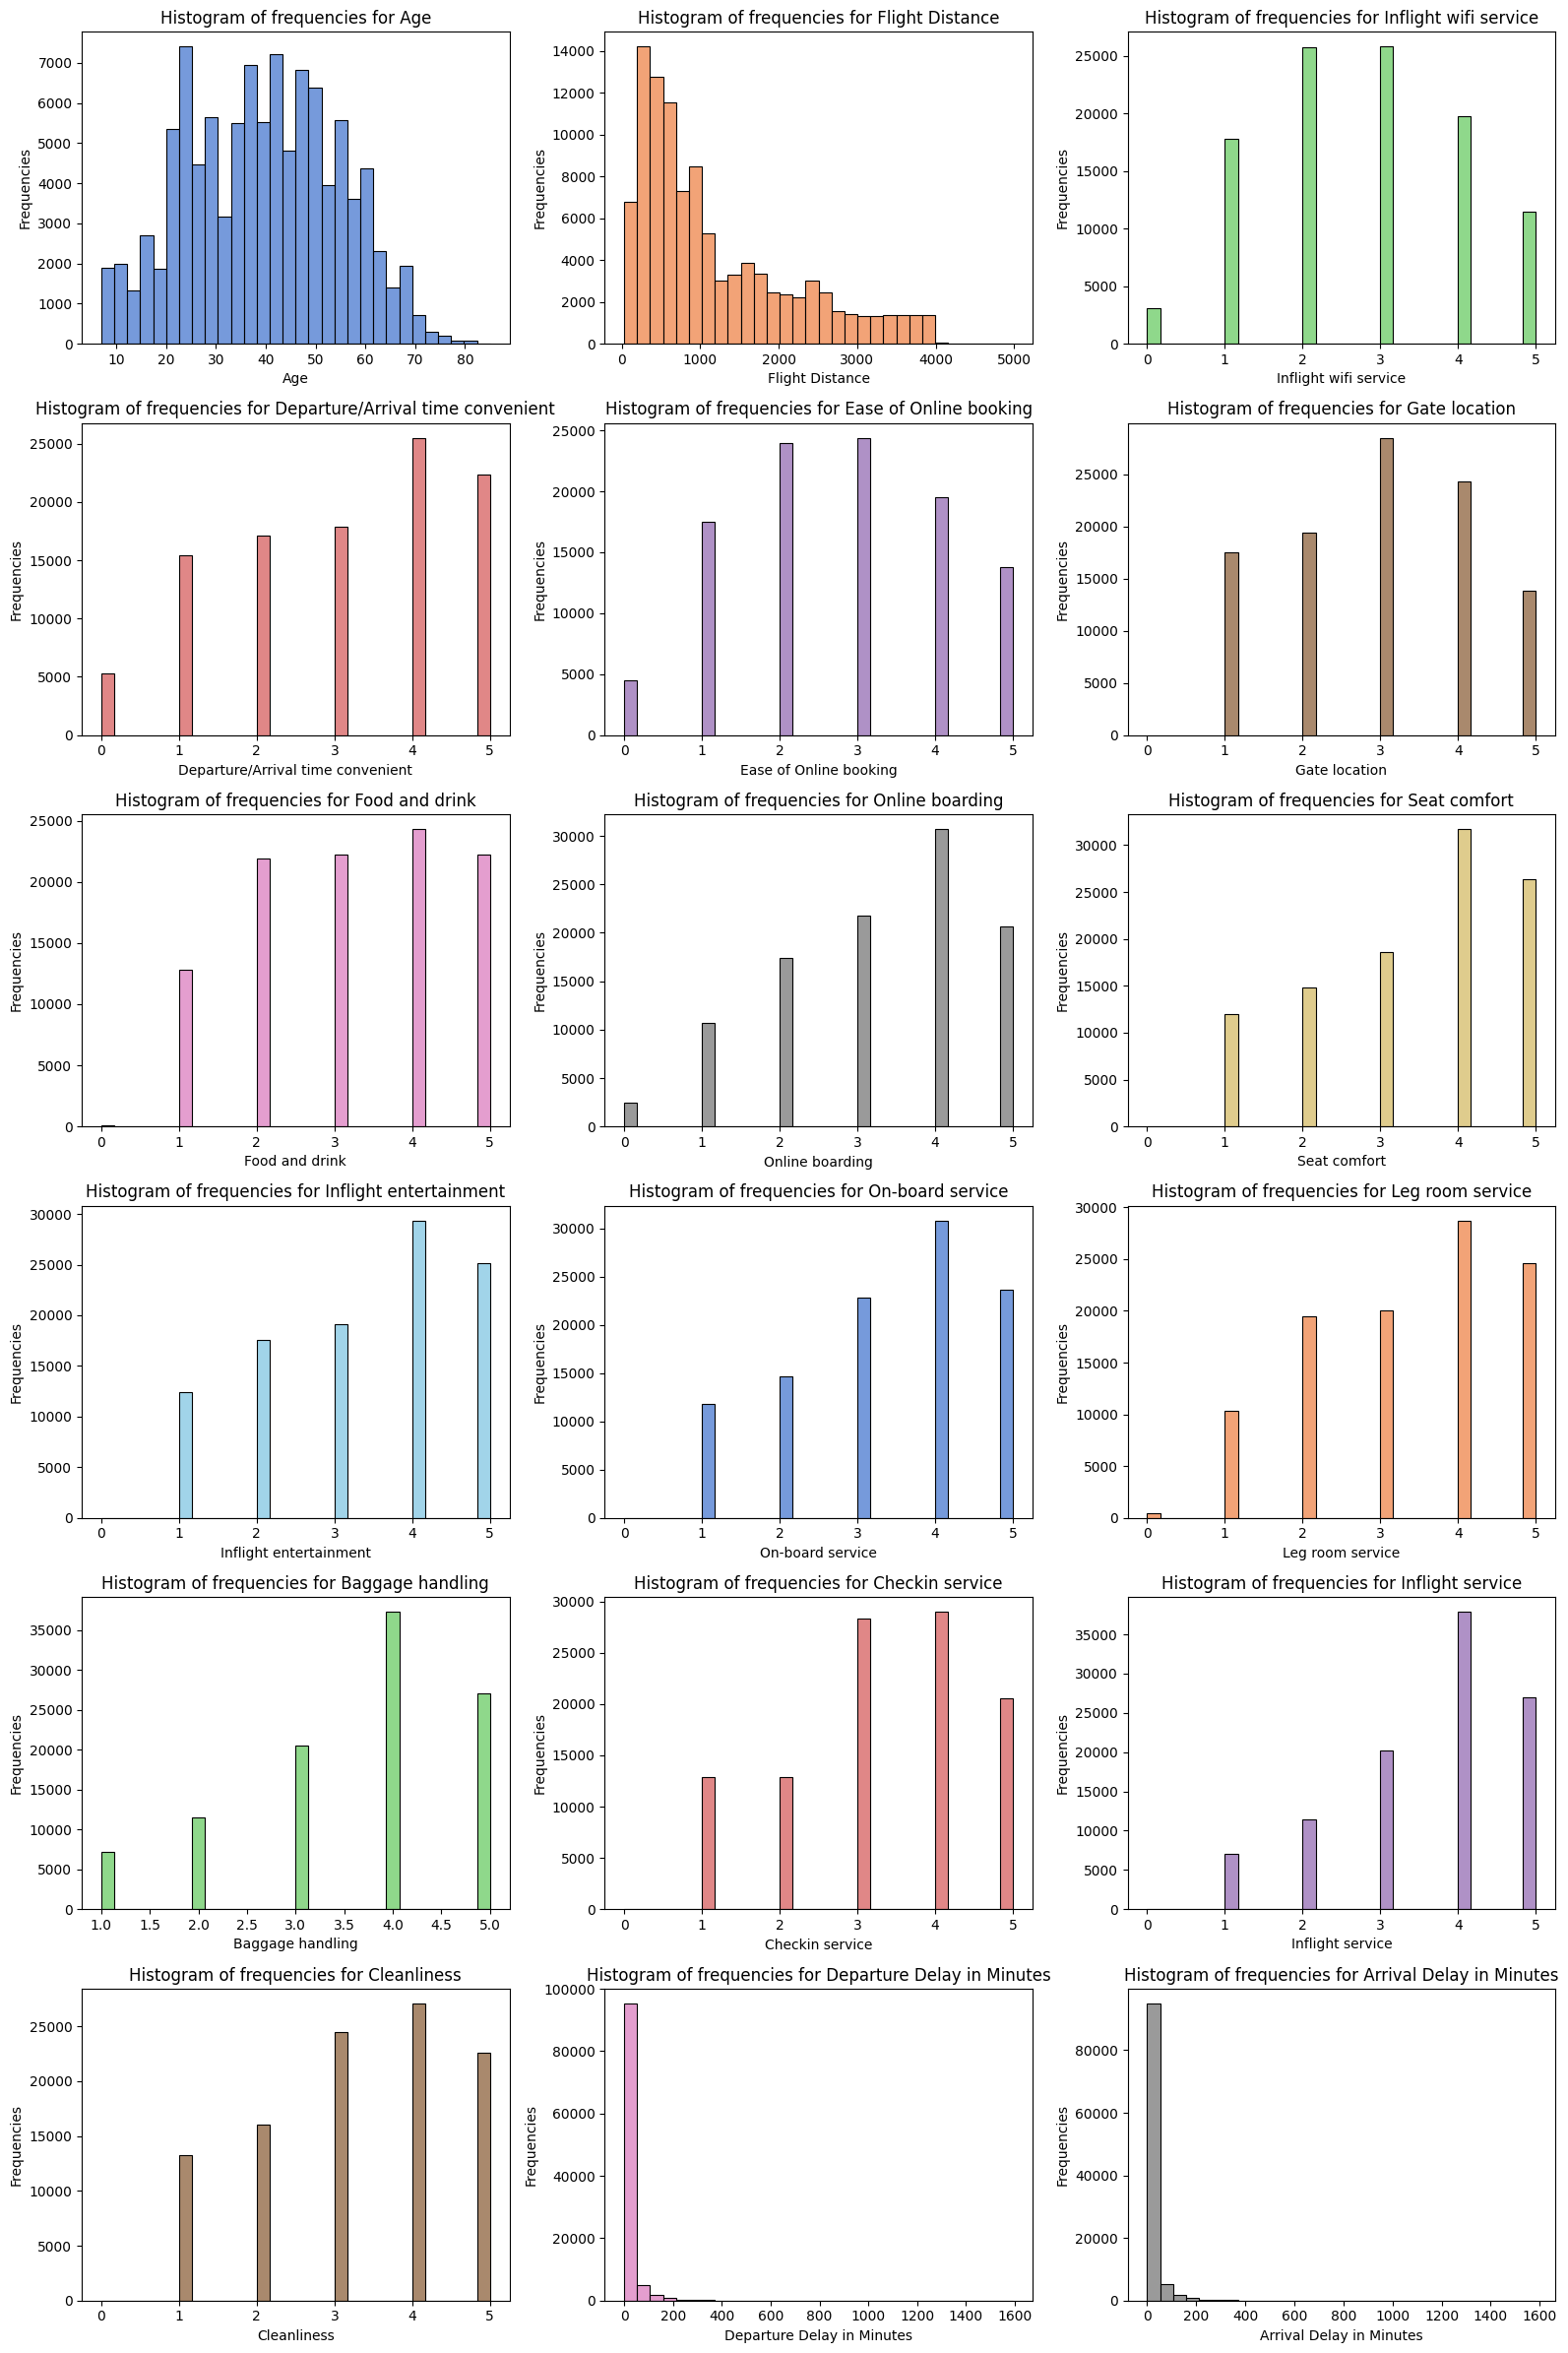

In [14]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 30)

---
**Comment:** These plots show frequancy distributions of all numerical features. 
        Based on the histograms:

- Age and flight distance:

    - The distribution of passenger ages is close to normal, with a peak around 30 years.
    - Flight distances are generally short, with a sharp drop after 1000 km.
- Service ratings:

    - Most satisfaction ratings (e.g. "Inflight wifi service", "Food and drink", "Seat comfort") are concentrated in the medium and high values.
    - Ratings are evenly distributed for a number of services, such as "Departure/Arrival time convenient" and "Online booking ease".
- Delays:

    - Most flights have minimal delays, but there are rare outliers with large delays.
    - In general, the distributions show a tendency towards satisfaction with most services, with the exception of rare negative cases.  
---

In [15]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** Gender ******
Gender
Female    52576
Male      51018
Name: count, dtype: int64

***** Customer Type ******
Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

***** Type of Travel ******
Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

***** Class ******
Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

***** satisfaction ******
satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64


---
**Comment:** Here we can see the number of rows with different values of categorical features.

---

In [16]:
%run scripts/classifiers.py
%reload_ext autoreload
%autoreload 2

#### 7. Exploration of Categorical Features

Pie charts were used to examine the distribution of categorical variables, ensuring a balanced dataset and identifying potential overrepresented or underrepresented classes.

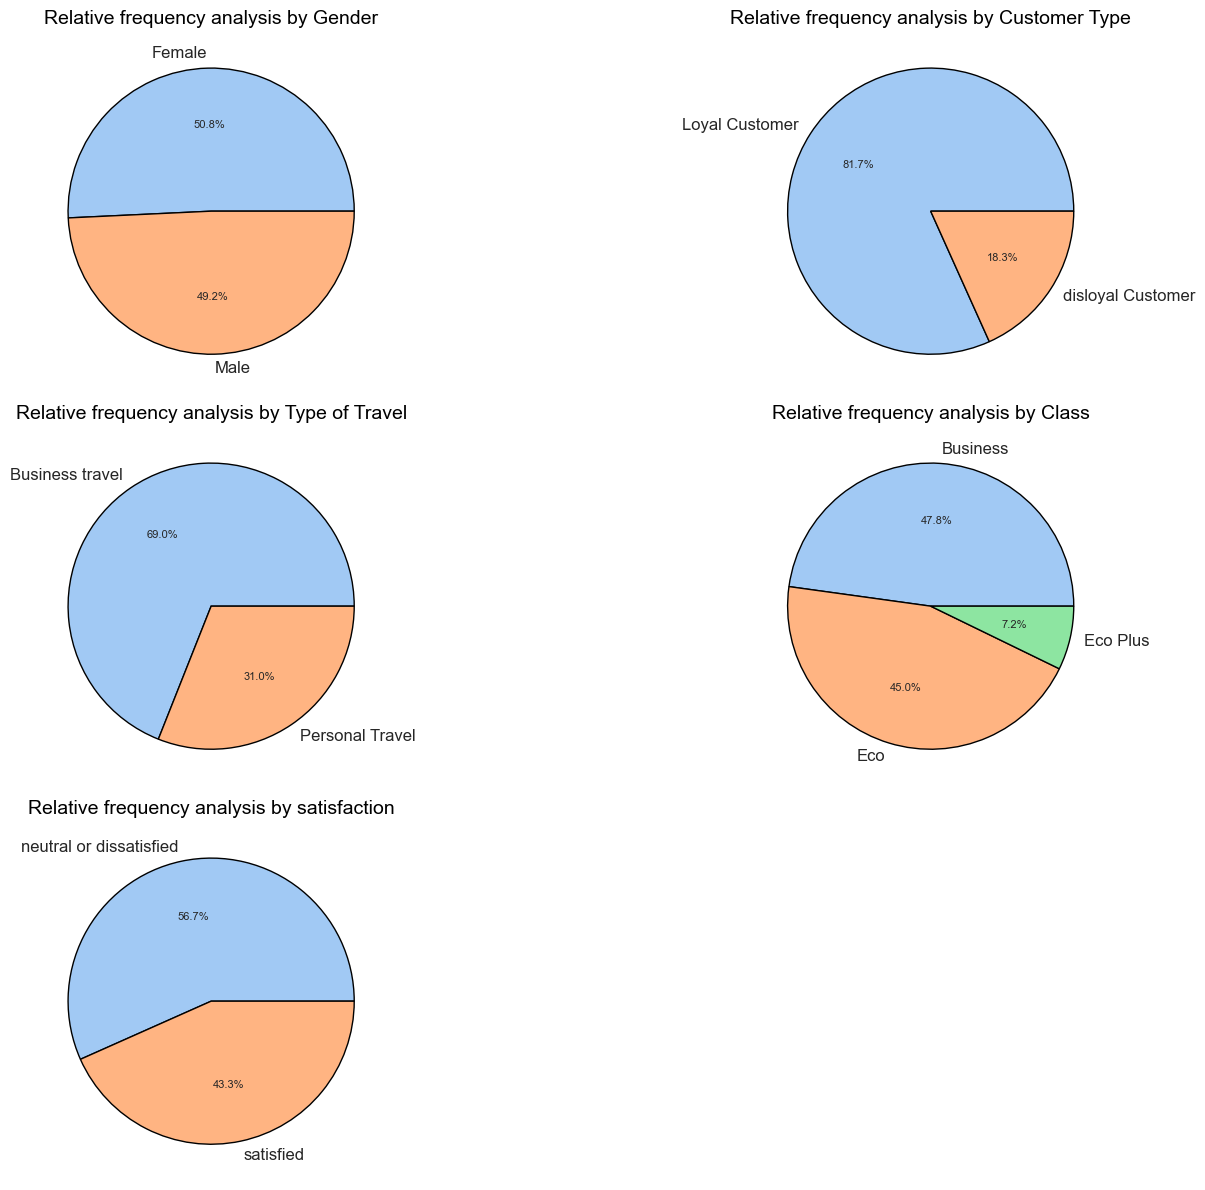

In [17]:
# iteratively pie chart
dp.iter_piechart(dataset, list(filter(lambda x: x not in ["country", "location_name"], cat_cols)))

---
**Comment:** Pie charts show relative distributions of values of each categorical feature. 
        Brief analysis of the pie charts:

- Gender:
    - The distribution of passengers by gender is almost even: 50.8% are women and 49.2% are men.
- Customer type:

    - A significant majority of passengers (81.7%) are loyal customers, while the share of disloyal ones is only 18.3%.
- Purpose of travel:

    - The majority of passengers (69%) travel for work, while personal travel accounts for 31%.
- Service class:

    - Almost half of passengers fly business class (47.8%), 45% fly economy, and only 7.2% choose Eco Plus.
- Satisfaction:

    - More than half of passengers (56.7%) remain neutral or dissatisfied, while 43.3% express satisfaction.

Overall conclusion: the customer base is dominated by loyal passengers traveling for work, with the distribution of classes and satisfaction varying significantly.

---

#### 8. Correlations Analysis

A correlation matrix shows the degree of linear relationship between variables in a data set. It is a table in which the correlation values ​​between all possible pairs of variables are presented. Correlation is measured in the range from -1 to +1:

- +1 means perfect positive correlation (when one variable increases, the other also increases).
- -1 means perfect negative correlation (when one variable increases, the other decreases).
- 0 means no linear relationship between the variables.

   Age  Flight Distance  Inflight wifi service  \
0   13              460                      3   
1   25              235                      3   
2   26             1142                      2   
3   25              562                      2   
4   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1

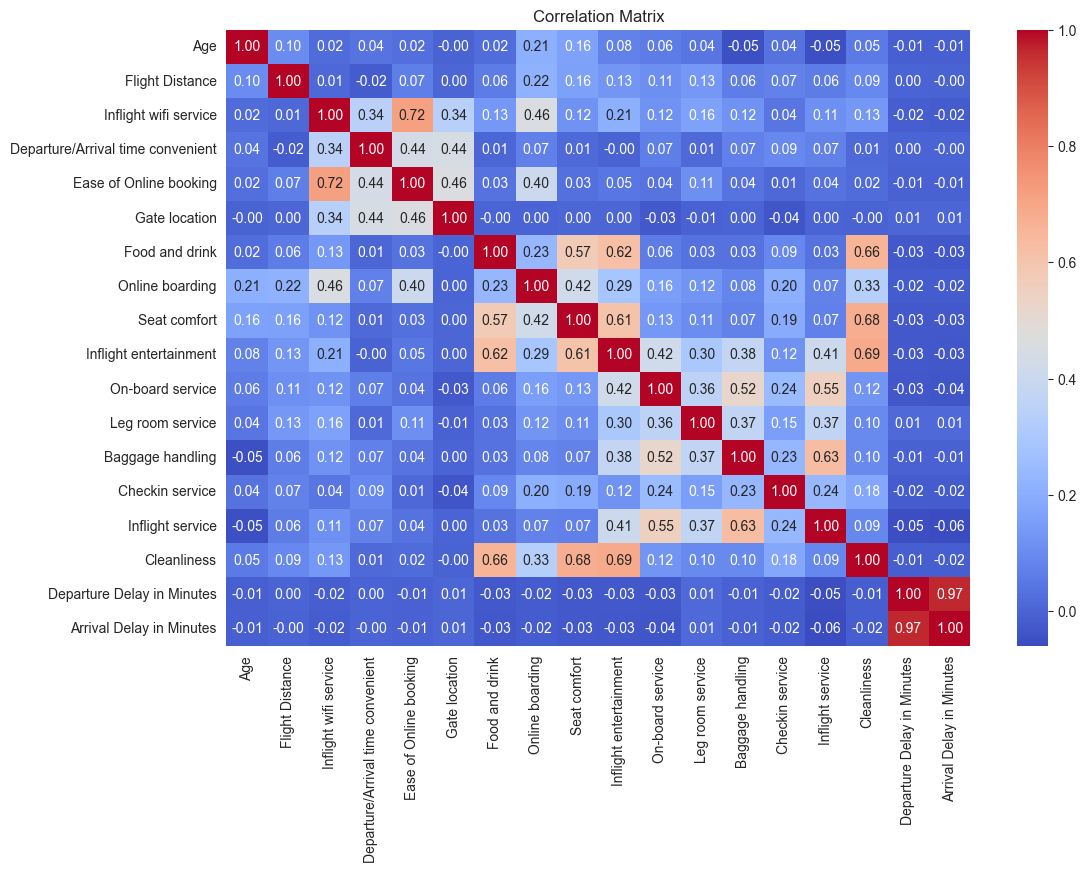

In [ ]:
# Select only numeric columns
numeric_data = dataset.select_dtypes(include=['number'])

# Checking Numeric Data
print(numeric_data.head())

# Calculation of the correlation matrix
correlation_matrix = numeric_data.corr()

# Derivation of the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sbn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

--- 
***Comments:***
- From the resulting matrix we see that the delayed arrival and departure times are very strongly dependent on each other. Therefore, one of these qualities must be removed.
- There are also other features with quite hight correlation but we will leave them as they are.

---

In [19]:
#deleting Departure Delay in Minutes from the dataset
dataset = dataset.drop(columns=["Departure Delay in Minutes"])

#### 9. Dataset Splitting

In [20]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "satisfaction"]
y = dataset["satisfaction"]

In [21]:
x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,0.0


In [22]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (103594, 21)
Dimension of target =  (103594,)


In [23]:
from sklearn.model_selection import train_test_split
# Разделение данных
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (82875, 21)
Y-train:  82875
X-test dim:  (20719, 21)
Y-test:  20719


---
***Comments:*** here we can see numbers of data for train and for test. We splitted them as 80% and 20% which is optimal for the task of ML.

---

#### 10. Transformations and Scaling

Transforming the numerical and categorical features  


* Numerical features: 
 ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Gate location',
                'Food and drink', 'Online boarding', 'Seat comfort', 
                'Inflight entertainment', 'On-board service', 'Leg room service', 
                'Baggage handling', 'Checkin service', 'Inflight service', 
                'Cleanliness', 'Arrival Delay in Minutes']
* Categorical features: 
 ['Gender', 'Customer Type', 'Type of Travel', 'Class']  

1. Numerical Feature Scaling:

   Features have different scales. To effectively train a model, they need to be scaled to the same scale.

- StandardScaler: Applied to features with a Gaussian-like distribution (e.g., Age, Flight Distance). This scales features to have a mean of 0 and a standard deviation of 1, ensuring consistent feature weighting.
- RobustScaler: Used for features with a high susceptibility to outliers (e.g., Inflight wifi service, Online boarding).

2. Categorical Feature Encoding:
- Categorical features such as Gender, Customer Type, Type of Travel, Class are converted into numeric format using OneHotEncoder. This allows the model to take all features into account during the training process.


In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
            (StandardScaler(), ['Age', 'Flight Distance']),
            (RobustScaler(), [
                'Inflight wifi service', 'Ease of Online booking', 'Gate location',
                'Food and drink', 'Online boarding', 'Seat comfort', 
                'Inflight entertainment', 'On-board service', 'Leg room service', 
                'Baggage handling', 'Checkin service', 'Inflight service', 
                'Cleanliness', 'Arrival Delay in Minutes'
            ]),
            (OneHotEncoder(handle_unknown="ignore"), ['Gender', 'Customer Type', 'Type of Travel', 'Class'])
)


---
**Comment:** Here we transformes our data. 
- Numerical features that has normal distributions are with StandardScaler()
- Other numerical features are with RobustScaler()
- Categorical features are with OneHotEncoder to have their values encoded as numbers. 

---

In [25]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Flight Distance']),
                                ('robustscaler', RobustScaler(),
                                 ['Inflight wifi service',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness',
                                  'Arrival Delay in Minutes']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'Class'])])

In [26]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [27]:
x_train

array([[-1.94659969, -0.18185361,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.76873039, -0.66373882,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.75450356, -0.9562762 ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.89459897, -0.17684441,  0.5       , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.30513745,  0.39721011,  0.5       , ...,  0.        ,
         1.        ,  0.        ],
       [-0.29091061, -0.24697323, -0.5       , ...,  0.        ,
         1.        ,  0.        ]], shape=(82875, 25))

In [28]:
y_train

66746     neutral or dissatisfied
54310                   satisfied
28706                   satisfied
38401     neutral or dissatisfied
9964      neutral or dissatisfied
                   ...           
39886     neutral or dissatisfied
102102    neutral or dissatisfied
77400                   satisfied
47692     neutral or dissatisfied
10339     neutral or dissatisfied
Name: satisfaction, Length: 82875, dtype: object

---
**Comment:** This is the transformed data.

---

In [29]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  ['neutral or dissatisfied' 'satisfied']


---
**Comment:** Classes that we can have as a result of classification.

---

#### 11. Building Models

Benchmark for Models
* KNN
* Random Forest

In [108]:
%reload_ext autoreload
%autoreload 2

### KNN Classifier

In [109]:
from scripts import KNNModel
import time

# train model
sttrain_knn = time.time()

knn_model = KNNModel()
best_knn_model, cv_knn_results = knn_model.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

C:\Users\gonch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.91663348 0.91669382 0.91984314 0.91987934 0.91977074 0.9198552
        nan 0.92570739        nan 0.92931523        nan 0.93087179
 0.91663348 0.91669382 0.91984314 0.91987934 0.91977074 0.9198552
 0.92590045 0.92570739 0.92919457 0.92931523 0.93067873 0.93087179
 0.91663348 0.91669382 0.91984314 0.91987934 0.91977074 0.9198552
 0.92590045 0.92570739 0.92919457 0.92931523 0.93066667 0.93087179
 0.91663348 0.91669382 0.91984314 0.91987934 0.91977074 0.9198552
        nan 0.92570739        nan 0.92931523        nan 0.93087179]
  warnings.warn(


Best KNN Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Time of training KNN: 4744.688 seconds


---
***Comments:***

***As a result of the training of KNN model we can see that the best KNN Parameters are***:
- algorithm='auto': The algorithm used to compute nearest neighbors (this lets scikit-learn decide the best option based on the data).
- metric='manhattan': The distance metric used for calculating distances (Manhattan distance, also known as L1 norm).
- n_neighbors=7: The number of neighbors to consider when making predictions.
- weights='distance': The weighting of neighbors, where closer neighbors have more influence on the prediction.

---

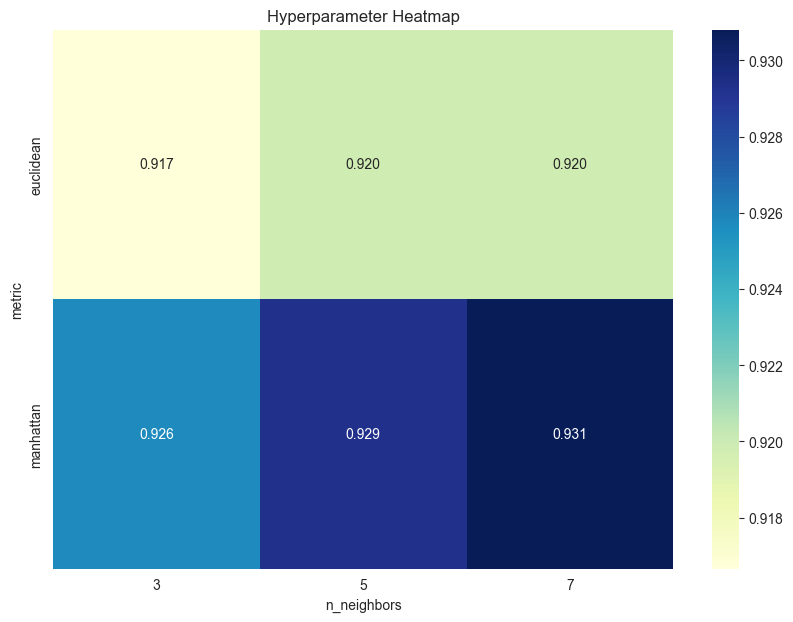

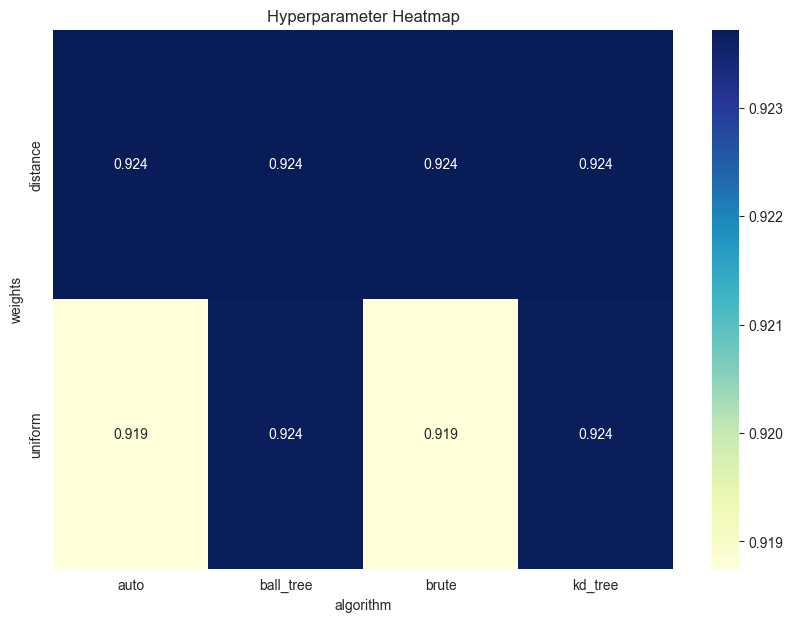

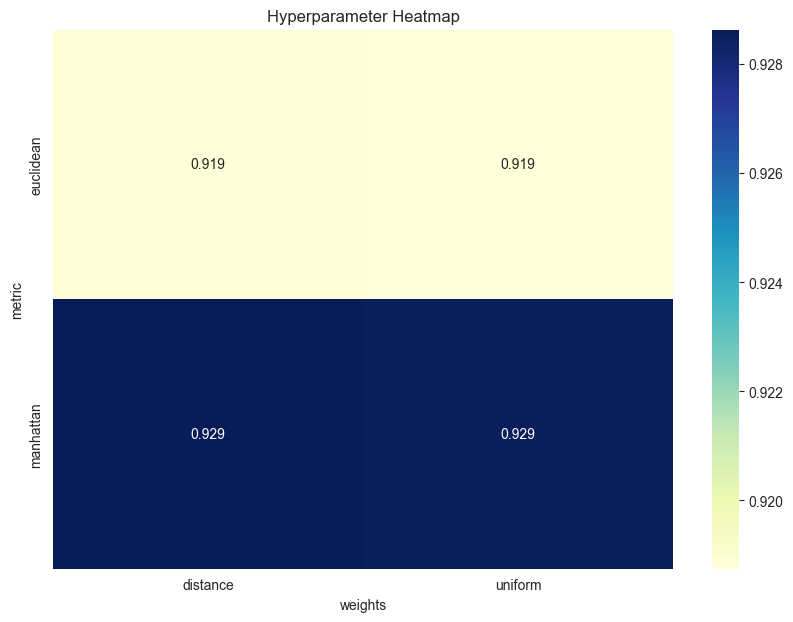

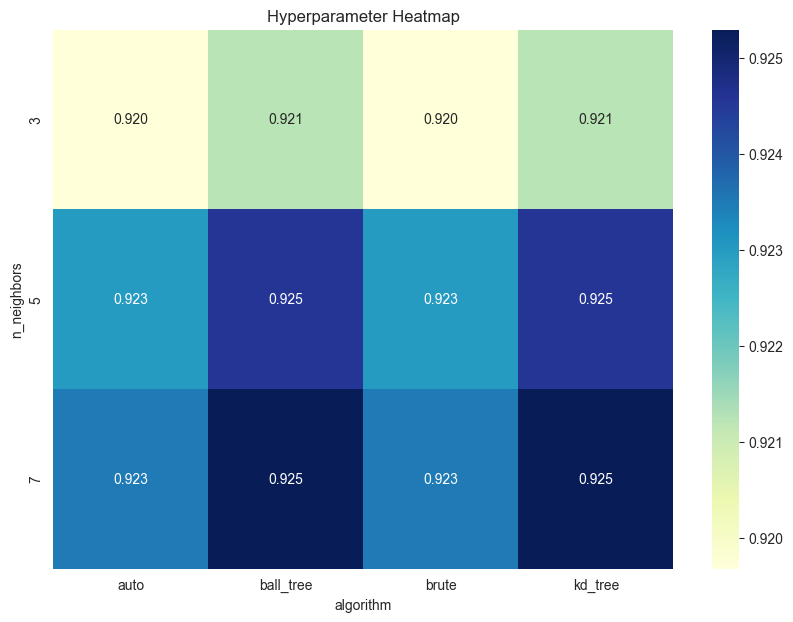

In [111]:
# analysing impact of different parameters of the model
def plot_hyperparameter_heatmap(cv_results, param_x, param_y, score_name="mean_test_score", title="Hyperparameter Heatmap"):
    x_values = cv_results[f"param_{param_x}"]
    y_values = cv_results[f"param_{param_y}"]
    scores = cv_results[score_name]

    data = pd.DataFrame({param_x: x_values, param_y: y_values, score_name: scores})
    pivot_table = data.pivot_table(values=score_name, index=param_y, columns=param_x)

    plt.figure(figsize=(10, 7))
    sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.title(title)
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.show()
    
cv_knn_results_df = pd.DataFrame(cv_knn_results)

plot_hyperparameter_heatmap(cv_knn_results_df, "n_neighbors", "metric")
plot_hyperparameter_heatmap(cv_knn_results_df, "algorithm", "weights")
plot_hyperparameter_heatmap(cv_knn_results_df, "weights", "metric")
plot_hyperparameter_heatmap(cv_knn_results_df, "algorithm", "n_neighbors")

--- 
***Comments:***
Having studied the data on the dependence of parameters on the accuracy of the model, we were convinced of the correctness of the selection of the best parameters for the model.

---

In [112]:
knn_model

In [113]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", best_knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", best_knn_model.predict(x_test[0:10]))

real values in train:  ['neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied']
predicted values in train:  ['neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied']
real values in test:  ['satisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied']
predicted values in test:  ['satisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied']


---
**Comment:** Here we can see that for train predictions 1 of 10 was predicted incorrect but for test everything is correct.

---

In [114]:
# deploy knn model
from scripts import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=best_knn_model)

In [115]:
# evaluate knn model
from scripts import EvalClassifier
rec_knn = DeployClassifier(path ="models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

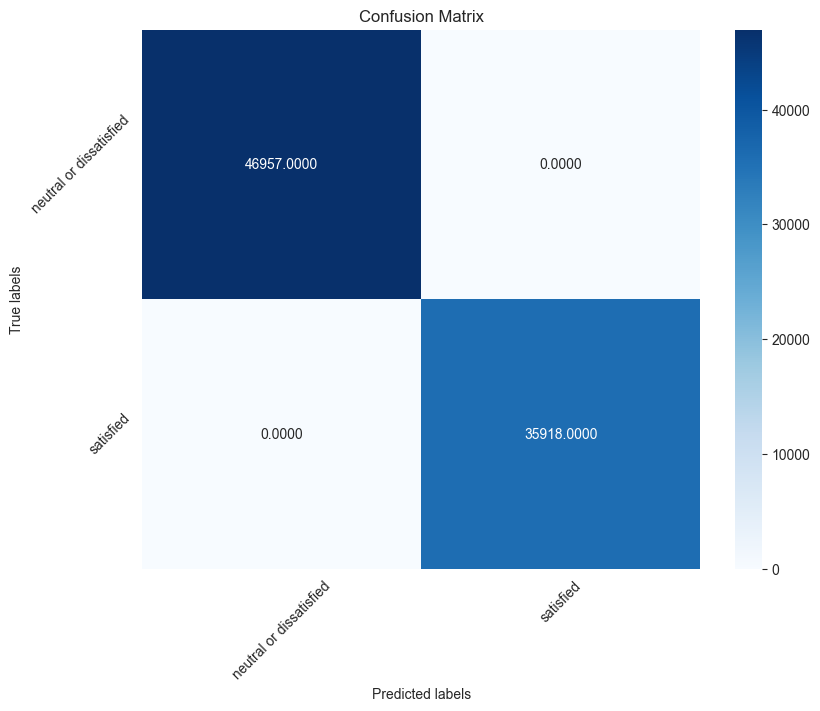

In [116]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

---
**Comment:** This matrix shows numbers of correctly defined values. 
- Diagonal elements (correct classifications)
    - Top left corner (46957.0000):
      The model correctly classified 46957 objects as "neutral or dissatisfied".
    - Bottom right corner (35918.0000):
      The model correctly classified 35918 objects as "satisfied".
- Off-diagonal elements are zero:
    - No false positives (FP) or false negatives (FN).
    - This indicates that the model predicts perfectly for every instance in the test set.

---

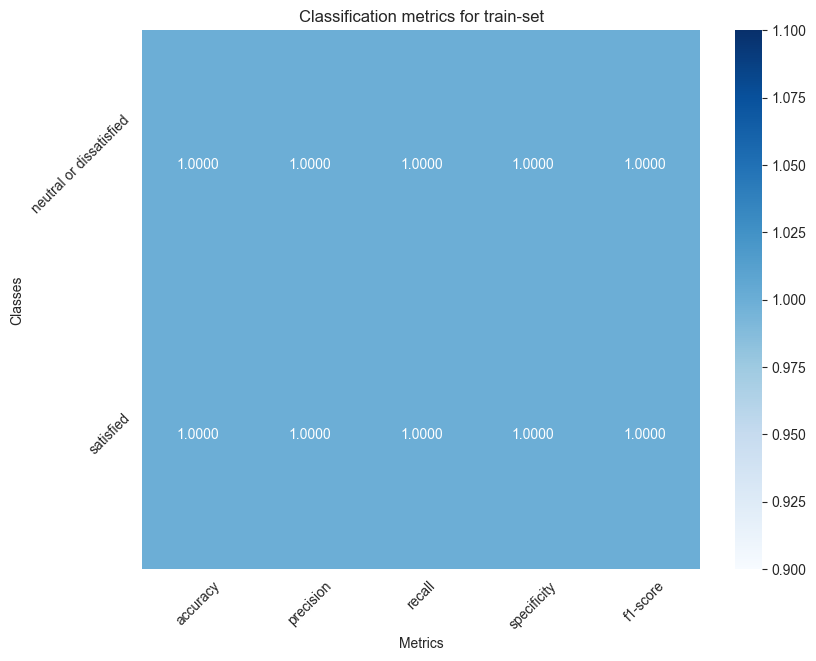

In [117]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

---
**Comment:** Classification metrics:
- accuracy : the ratio of correctly predicted values among all predictions.
$$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Number of Observations}} $$
- precision : the ratio of correctly predicted positive observations to the total predicted positives.
$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$
- recall : it measures how well the model identifies true positive cases.
$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$
- specificity : measures how well the model identifies true negative cases
$$ \text{Specificity} = \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Positives}} $$
- f1-score : the weighted average of precision and recall, providing a balance between them.
$$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

**For our trai data** : every metric has perfect value.

---

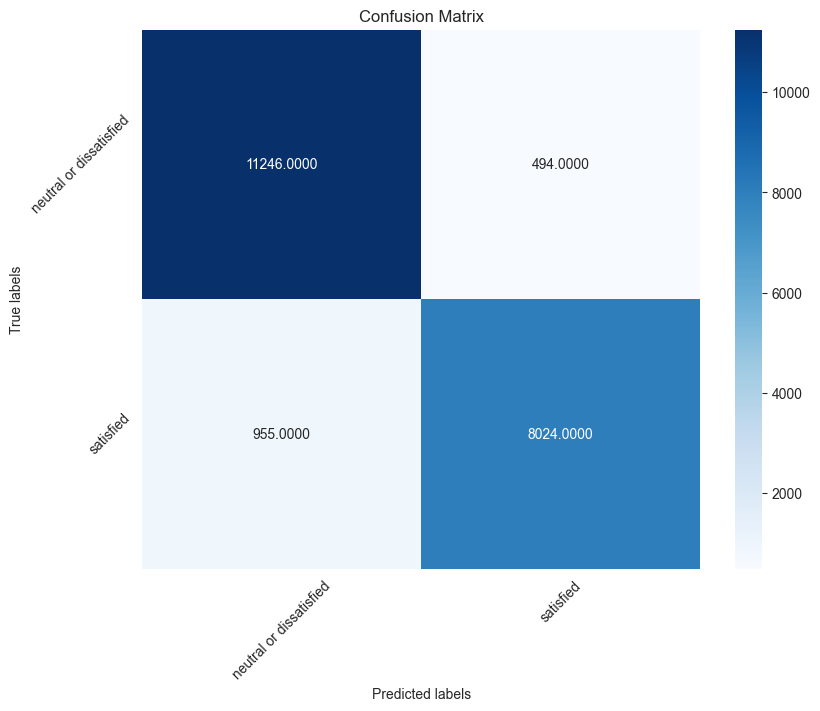

In [118]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

---
**Comment:** This matrix shows numbers of correctly defined values both for 'satisfied' and 'neutral or dissatisfied' (for test part). 
- 'satisfied' values that were predicted right : 8 024 (94%)
- 'satisfied' values that were predicted wrong : 494 (6%)
- 'neutral or dissatisfied' values that were predicted right : 11 246 (92%)
- 'neutral or dissatisfied' values that were predicted wrong : 955 (8%)

---

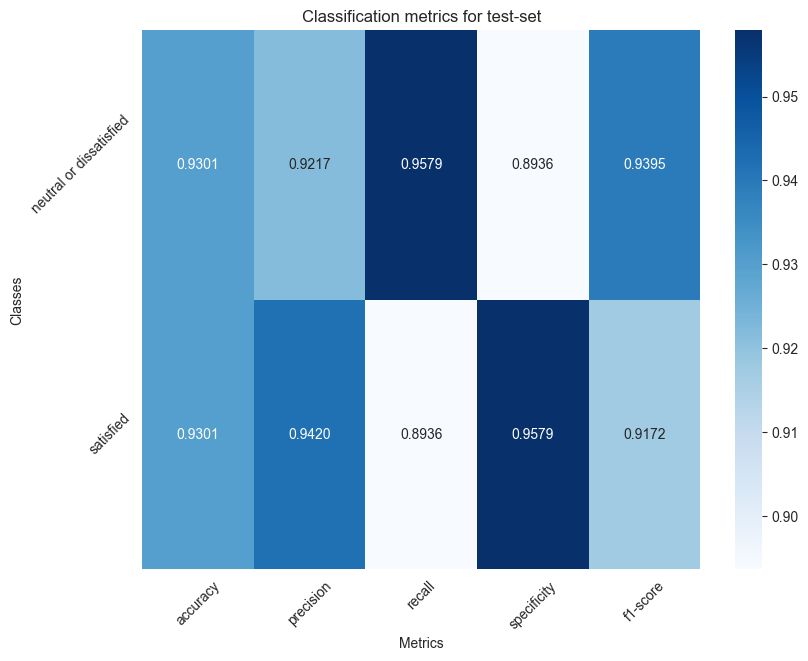

In [119]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

---
**Comment:** For test set all metrics are around 89-95 which is very good.

---

In [120]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.930064,0.931866,0.925781,0.925781,0.928331


---
**Comment:** here we can see metrics for whole test set. The model's performance is consistent across all metrics, with values around 0.69. The balance between these metrics indicates that the model is relatively stable in terms of both false positives and false negatives.

---

#### Conclusion about KNN Model:

The overall results indicate that the model is of high quality. It has a balanced performance, with good values ​​for all metrics. Precision, recall, specificity, and F1-score are all high, indicating that the model is performing well and handles both positive and negative classes well. If the data is balanced, such results indicate that the model is doing a good job of classifying.


In [161]:
%run scripts/evaluator.py
%reload_ext autoreload
%autoreload 2

### Random Forest Classifier

In [30]:
from scripts import RandomForestModel
import time

# train model
sttrain_rf = time.time()

rf_model = RandomForestModel()
best_rf_model, cv_rf_results = rf_model.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Time of training Random Forest: 2140.695 seconds


---
***Comments:***

Model parameters:
- max_depth=None: Trees grow without depth limitation, which can lead to overfitting on noisy data.
- max_features='sqrt': Each tree uses a random subset of features, which helps improve generalization and reduces correlation between trees.
- min_samples_leaf=1 and min_samples_split=2: Allow trees to create fine-grained splits, which improves accuracy but can increase the risk of overfitting.
- n_estimators=100: Moderate number of trees, which helps improve predictions but increases computational cost.
- Training time (35 minutes): Training time is quite high, due to the large number of trees and computational complexity.

---

In [31]:
rf_model

In [32]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", best_rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", best_rf_model.predict(x_test[0:10]))

real values in train:  ['neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied']
predicted values in train:  ['neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied']
real values in test:  ['satisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied']
predicted values in test:  ['satisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied']


---
**Comment:** for train set there are 2 wrong out of 10 results. For test set also 2 out of 10.

---

In [33]:
cv_results_df = pd.DataFrame(cv_rf_results)

In [34]:
def plot_hyperparameter_influence_all(cv_results, param_name, metrics=["mean_test_score"], title="Influence of Hyperparameter"):
        param_values = cv_results["param_" + param_name]
        plt.figure(figsize=(15, 5))
        
        for i, metric in enumerate(metrics):
            mean_scores = cv_results[metric]
            plt.subplot(1, len(metrics), i + 1)
            plt.plot(param_values, mean_scores, marker='o')
            plt.title(f"{title} - {metric}")
            plt.xlabel(param_name)
            plt.ylabel(metric.replace("_", " ").capitalize())
            plt.grid(True)
        
        plt.tight_layout()
        plt.show()

In [36]:
import seaborn as sns

In [37]:
def plot_hyperparameter_heatmap(cv_results, param_x, param_y, score_name="mean_test_score", title="Hyperparameter Influence Heatmap"):
    # Extract data for heatmap
    x_values = cv_results["param_" + param_x]
    y_values = cv_results["param_" + param_y]
    scores = cv_results[score_name]

    data = pd.DataFrame({param_x: x_values, param_y: y_values, score_name: scores})
    pivot_table = data.pivot_table(values=score_name, index=param_y, columns=param_x)

    # Plot heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.title(title)
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.show()

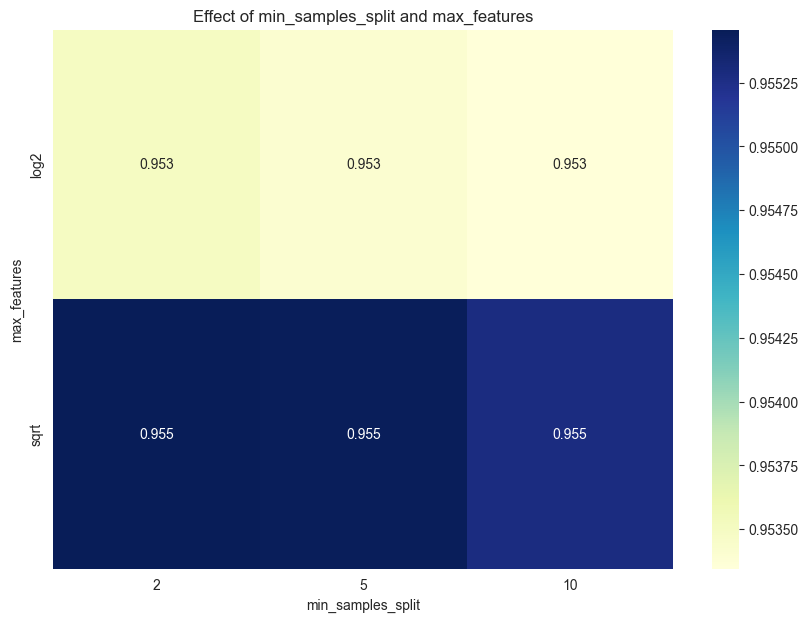

In [50]:
plot_hyperparameter_heatmap(
    cv_results_df,
    param_x="min_samples_split",
    param_y="max_features",
    score_name="mean_test_score",
    title="Effect of min_samples_split and max_features"
)

In [ ]:
plot_hyperparameter_heatmap(
    cv_results_df,
    param_x="n_estimators",
    param_y="max_depth",
    score_name="mean_test_score",
    title="Effect of n_estimators and max_depth"
)

In [39]:
# deploy rf model
from scripts import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=best_rf_model)

In [40]:
# evaluate rf model
from scripts import EvalClassifier
rec_rf = DeployClassifier(path ="models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

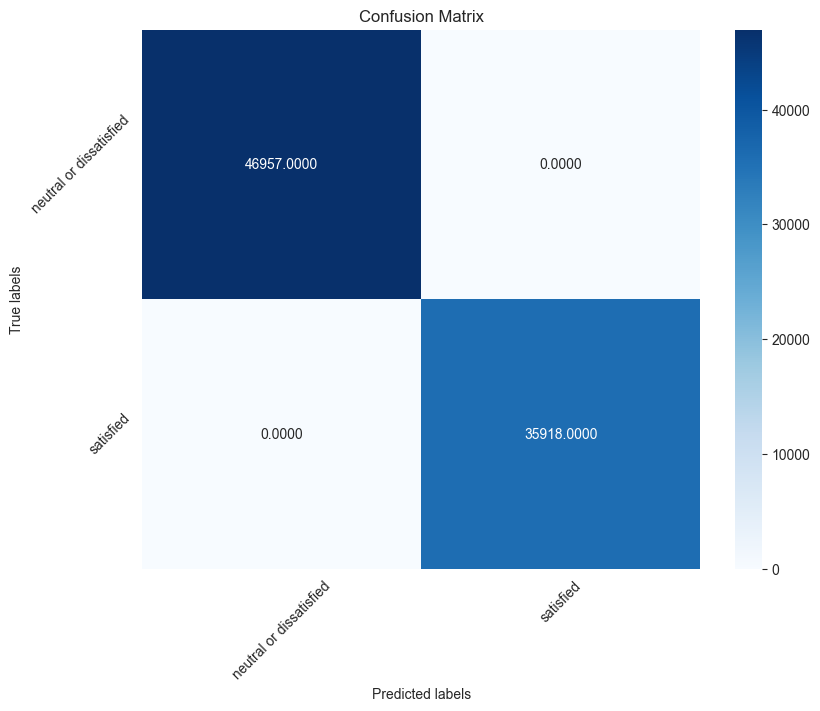

In [41]:
# get confusion matrix in training
y_pred_rf = rec_rf.predict(x_train)
cmrf_train_rf = eval_rf.get_confusion_matrix(y_train.values, y_pred_rf, classes)
eval_rf.plot_confusion_matrix(cmrf_train_rf, classes)

---
**Comment:** This matrix shows numbers of correctly defined values both for 'satisfied' and 'neutral or dissatisfied' (for train part). 
- 'satisfied' values that were predicted right : 100%
- 'satisfied' values that were predicted wrong : 0%
- 'neutral or dissatisfied' values that were predicted right : 100%
- 'neutral or dissatisfied' values that were predicted wrong : 0%

---

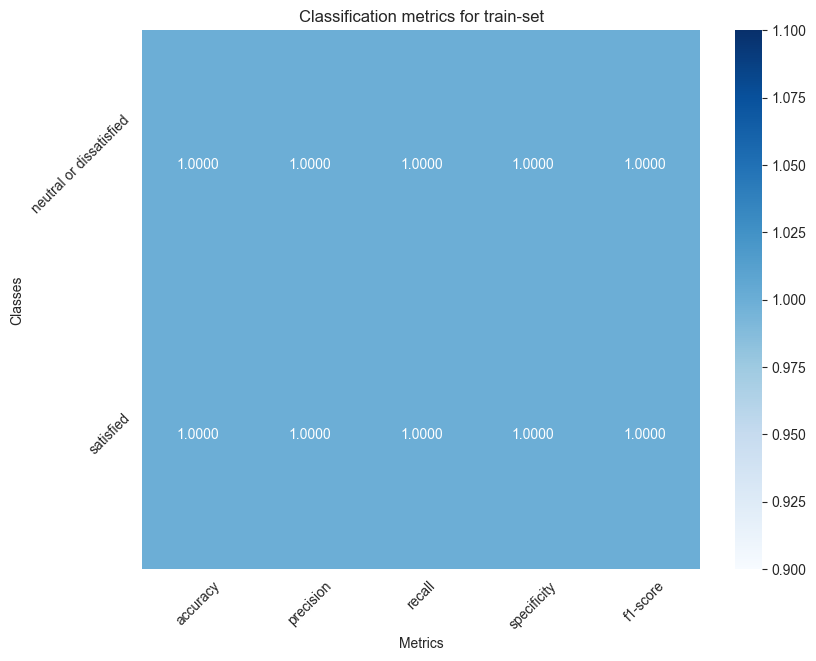

In [42]:
metrics_train_rf = eval_rf.calculate_metrics_by_class(cmrf_train_rf, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

---
**Comment:** The situation with the training set is similar to what was with the KNN model.

---

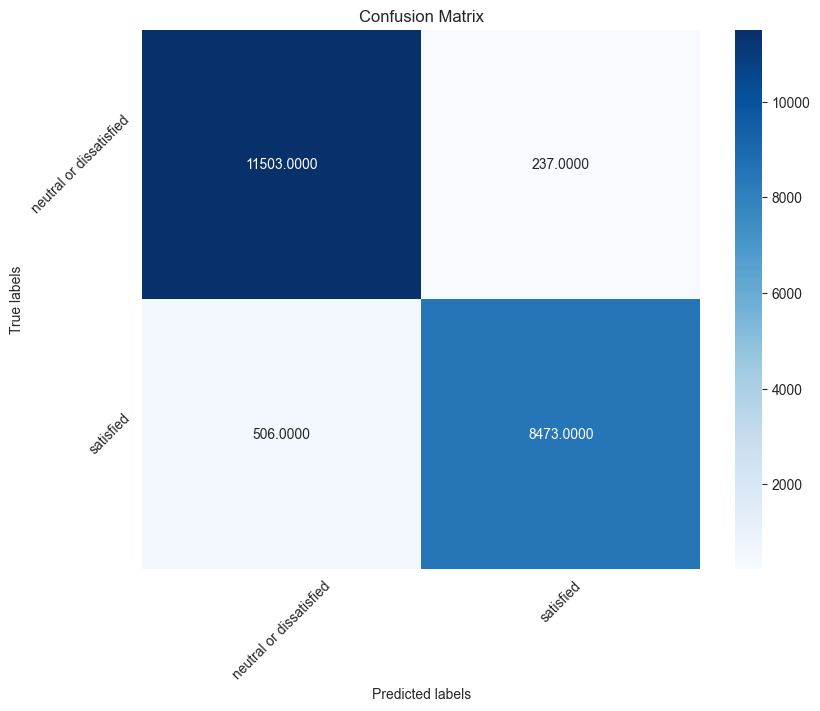

In [44]:
# get confusion matrix in testing
y_pred_rf = rec_rf.predict(x_test)
cmrf_test_rf = eval_rf.get_confusion_matrix(y_test, y_pred_rf, classes)
eval_rf.plot_confusion_matrix(cmrf_test_rf, classes)

---
**Comment:** This matrix shows numbers of correctly defined values both for 'satisfied' and 'neutral or dissatisfied' (for test part). 
- 'satisfied' values that were predicted right : 8 473 (96%)
- 'satisfied' values that were predicted wrong : 237 (4%)
- 'neutral or dissatisfied' values that were predicted right : 11 503 (96%)
- 'neutral or dissatisfied' values that were predicted wrong : 506 (4%)

---

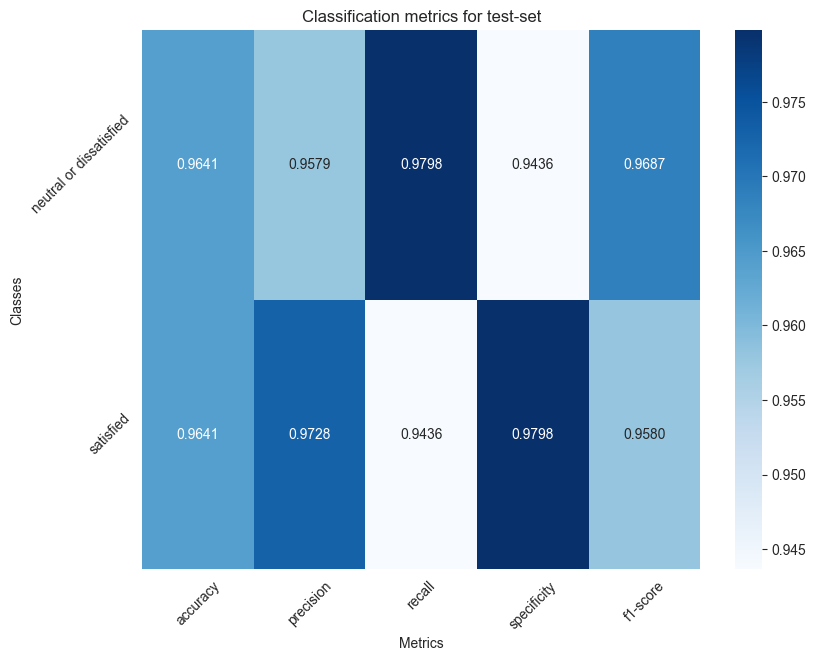

In [45]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test_rf, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

---
**Comment:** The situation is also quite similar to the previous model, but the metric values ​​are slightly higher.

---

In [46]:
# calculate the metrics for whole test set
eval_rf.calculate_metrics_xall(cmrf_test_rf, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.964139,0.965327,0.961729,0.961729,0.963355


---
***Comments:*** All metrics are very high.

---

#### Conclusion about Random Forest Model:
Classification Quality: The model demonstrates excellent performance with high values ​​for all metrics. Precision and recall are in good balance, which is confirmed by the high F1-score.

Generalization Ability: Given the equality of precision and specificity, the model works equally well with both positive and negative classes, which indicates its ability to generalize.

Applicability: The model is suitable for tasks where it is important to avoid both false positive and false negative classifications.

### Comparing 2 Models

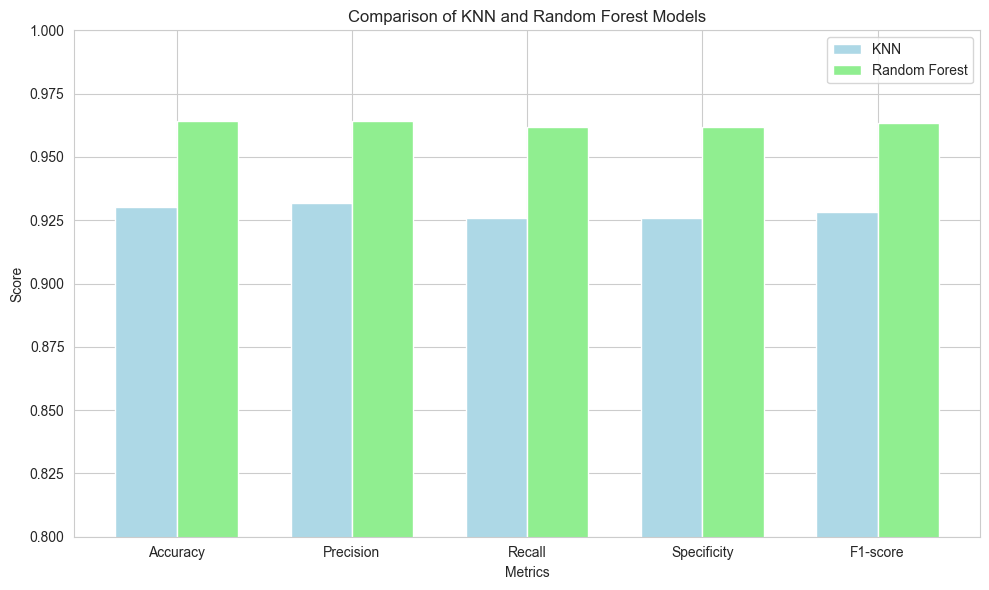

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for the models
metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-score']
knn_metrics = [0.930064, 0.931866, 0.925781, 0.925781, 0.928331]
rf_metrics = [0.964139, 0.964139, 0.961729, 0.961729, 0.963355] 

# Positons on the plot
x = np.arange(len(metrics))
width = 0.35 

# Histograms
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, knn_metrics, width, label='KNN', color='lightblue')
plt.bar(x + width/2, rf_metrics, width, label='Random Forest', color='lightgreen')

# Settings
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of KNN and Random Forest Models')
plt.xticks(x, metrics)
plt.ylim(0.8, 1.0)
plt.legend()

plt.tight_layout()
plt.show()


#### Results of the comparising

1.	Classification quality:
    - Random Forest performs slightly better across all metrics (0.5–1% improvement on average).
    - However, the difference is small and may not be statistically significant.
2.	Training time:
    - Random Forest is significantly faster to train (145 sec vs. 3791 sec for KNN), making it preferable for tasks with large amounts of data.
3.	Balance between metrics:
    - Both models demonstrate stable values for all metrics, indicating good generalization to test data.
    - If the priority is to minimize false classifications, Random Forest may be slightly better due to higher precision and recall.
